<h1>Импорт библиотек

In [2]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [3]:
def sum_prod(X, V):
    '''
    X - матрицы (n, n)
    V - векторы (n, 1)
    Гарантируется, что len(X) == len(V)
    '''
    if not X or not V: 
        return np.array([[0]])  # Если один из списков пуст, возвращаем нулевой вектор (1, 1)

    total_sum = np.zeros((X[0].shape[0], 1))

    for matrix, vector in zip(X, V):
        product = matrix @ vector  # Вычисляем произведение матрицы и вектора
        total_sum += product 

    return total_sum  

In [4]:
def test_sum_prod():
    # Тест 1
    X1 = [np.array([[1, 2], [3, 4]]), np.array([[5, 6], [7, 8]])]
    V1 = [np.array([[1], [1]]), np.array([[1], [1]])]
    assert np.array_equal(sum_prod(X1, V1), np.array([[14], [22]])), "Test case 1 failed"

    # Тест 2
    X2 = [np.array([[1, 0], [0, 1]]), np.array([[2, 2], [2, 2]])]
    V2 = [np.array([[1], [1]]), np.array([[0], [1]])]
    assert np.array_equal(sum_prod(X2, V2), np.array([[3], [3]])), "Test case 2 failed"

    # Тест 3
    X3 = [np.array([[1, 2, 3], [4, 5, 6]]), np.array([[7, 8, 9], [10, 11, 12]])]
    V3 = [np.array([[1], [1], [1]]), np.array([[1], [1], [1]])]
    assert np.array_equal(sum_prod(X3, V3), np.array([[30], [48]])), "Test case 3 failed"

    # Тест 4
    X4 = [np.array([[1]]), np.array([[2]])]
    V4 = [np.array([[1]]), np.array([[1]])]
    assert np.array_equal(sum_prod(X4, V4), np.array([[3]])), "Test case 4 failed"

    # Тест 5
    X5 = []
    V5 = []
    assert np.array_equal(sum_prod(X5, V5), np.array([[0]])), "Test case 5 failed"  # Пустой случай

    print("All test cases passed!")


test_sum_prod()

All test cases passed!


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [5]:
def binarize(M, threshold=0.5):
    return (M > threshold).astype(int)

In [6]:
def test_binarize():
    # Тест 1
    M1 = np.array([[0.2, 0.6], [0.8, 0.4]])
    expected1 = np.array([[0, 1], [1, 0]])
    assert np.array_equal(binarize(M1, 0.5), expected1), "Test case 1 failed"

    # Тест 2
    M2 = np.array([[0, 0, 0], [0, 0, 0]])
    expected2 = np.array([[0, 0, 0], [0, 0, 0]])
    assert np.array_equal(binarize(M2, 0.5), expected2), "Test case 2 failed"

    # Тест 3
    M3 = np.array([[1, 2], [3, 0]])
    expected3 = np.array([[0, 1], [1, 0]])
    assert np.array_equal(binarize(M3, 1), expected3), "Test case 3 failed"

    # Тест 4
    M4 = np.array([[0.5, 0.5], [0.5, 0.5]])
    expected4 = np.array([[0, 0], [0, 0]])
    assert np.array_equal(binarize(M4, 0.5), expected4), "Test case 4 failed"

    # Тест 5
    M5 = np.array([[-1, 0, 1], [2, -2, 0.5]])
    expected5 = np.array([[0, 0, 1], [1, 0, 1]])  # Исправлено, чтобы учесть, что 0 становится 0, а 1 и 2 становятся 1
    assert np.array_equal(binarize(M5, 0), expected5), "Test case 5 failed"

    print("All test cases passed!")


test_binarize()

All test cases passed!


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [7]:
def unique_rows(mat):
    # Это позволяет получить список уникальных элементов в каждой строке
    return [np.unique(row) for row in mat]


def unique_columns(mat):
    # Применяется np.unique к каждому столбцу матрицы
    return [np.unique(mat[:, col]) for col in range(mat.shape[1])]

In [8]:
def test_unique():
    # Тест 1
    mat1 = np.array([[1, 2, 2], [3, 4, 4], [5, 6, 6]])
    expected_rows1 = [np.array([1, 2]), np.array([3, 4]), np.array([5, 6])]
    expected_cols1 = [np.array([1, 3, 5]), np.array([2, 4, 6])]
    
    assert all(np.array_equal(unique_rows(mat1)[i], expected_rows1[i]) for i in range(len(expected_rows1))), "Test case 1 failed (rows)"
    assert all(np.array_equal(unique_columns(mat1)[i], expected_cols1[i]) for i in range(len(expected_cols1))), "Test case 1 failed (columns)"
    
    # Тест 2
    mat2 = np.array([[7, 8, 7], [9, 8, 9], [7, 8, 7]])
    expected_rows2 = [np.array([7, 8]), np.array([8, 9]), np.array([7, 8])]
    expected_cols2 = [np.array([7, 9]), np.array([8])]
    
    assert all(np.array_equal(unique_rows(mat2)[i], expected_rows2[i]) for i in range(len(expected_rows2))), "Test case 2 failed (rows)"
    assert all(np.array_equal(unique_columns(mat2)[i], expected_cols2[i]) for i in range(len(expected_cols2))), "Test case 2 failed (columns)"

    # Тест 3
    mat3 = np.array([[1, 1, 1], [1, 1, 1]])
    expected_rows3 = [np.array([1]), np.array([1])]
    expected_cols3 = [np.array([1]), np.array([1])]
    
    assert all(np.array_equal(unique_rows(mat3)[i], expected_rows3[i]) for i in range(len(expected_rows3))), "Test case 3 failed (rows)"
    assert all(np.array_equal(unique_columns(mat3)[i], expected_cols3[i]) for i in range(len(expected_cols3))), "Test case 3 failed (columns)"
    
    # Тест 4
    mat4 = np.array([[1]])
    expected_rows4 = [np.array([1])]
    expected_cols4 = [np.array([1])]
    
    assert all(np.array_equal(unique_rows(mat4)[i], expected_rows4[i]) for i in range(len(expected_rows4))), "Test case 4 failed (rows)"
    assert all(np.array_equal(unique_columns(mat4)[i], expected_cols4[i]) for i in range(len(expected_cols4))), "Test case 4 failed (columns)"

    print("All test cases passed!")


test_unique()

All test cases passed!


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

In [9]:
# Your code goes here
def fill_and_analyze_matrix(rows, cols):
    """
    Создает матрицу случайных чисел, вычисляет математические ожидания и
    дисперсии (один из основных показателей статистики, характеризующих 
    разброс значений в выборке или генеральной совокупности) для строк и 
    столбцов, а затем строит гистограммы для каждой строки и каждого столбца.
    
    Args:
        rows (int): Количество строк в матрице.
        cols (int): Количество столбцов в матрице.
    
    Returns:
        tuple: Возвращает сформированную матрицу, средние значения и
               дисперсии для строк и столбцов.
    """
    # 1. Заполняем матрицу случайными числами по нормальному закону распределения
    matrix = np.random.normal(loc=0, scale=1, size=(rows, cols))
    
    # 2. Вычисляем математические ожидания и дисперсию для строк и столбцов
    row_means = np.mean(matrix, axis=1)  # Средние значения для каждой строки
    row_variances = np.var(matrix, axis=1)  # Дисперсии для каждой строки
    
    col_means = np.mean(matrix, axis=0)  # Средние значения для каждого столбца
    col_variances = np.var(matrix, axis=0)  # Дисперсии для каждого столбца
    
    # 3. Строим гистограммы для каждой строки и каждого столбца
    for i in range(rows):
        plt.figure()
        plt.hist(matrix[i], bins=10, alpha=0.7, color='blue')
        plt.title(f'Histogram for Row {i+1}')
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()
    
    for j in range(cols):
        plt.figure()
        plt.hist(matrix[:, j], bins=10, alpha=0.7, color='orange')
        plt.title(f'Histogram for Column {j+1}')
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()
    
    # Возвращаем сформированную матрицу, средние значения и дисперсии
    return matrix, row_means, row_variances, col_means, col_variances

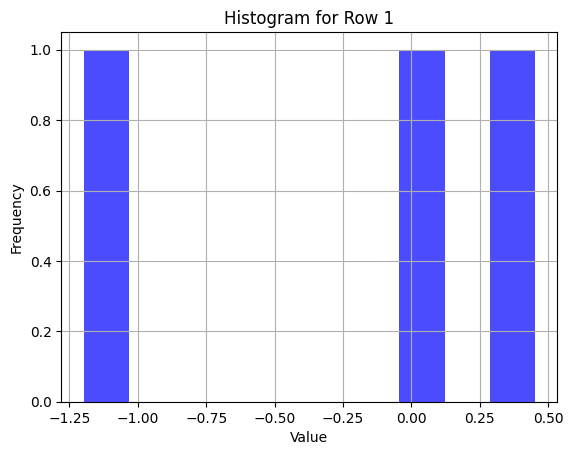

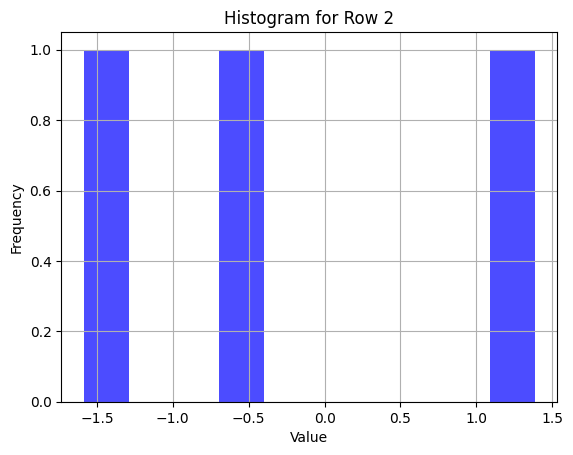

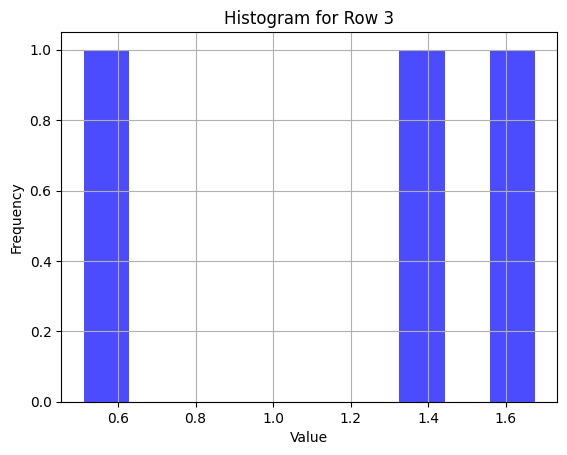

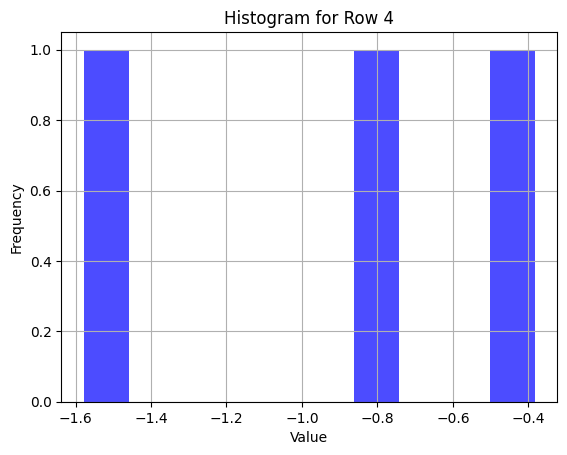

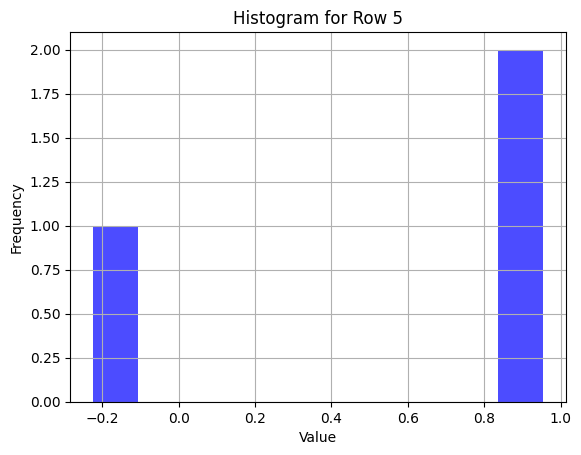

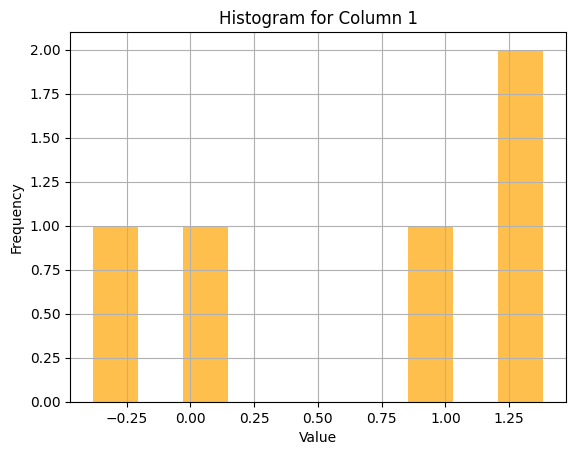

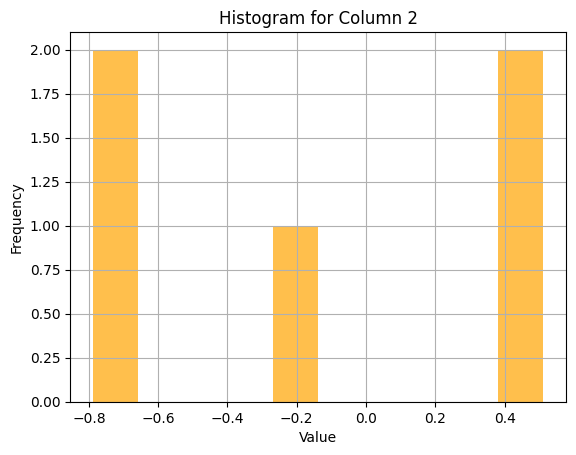

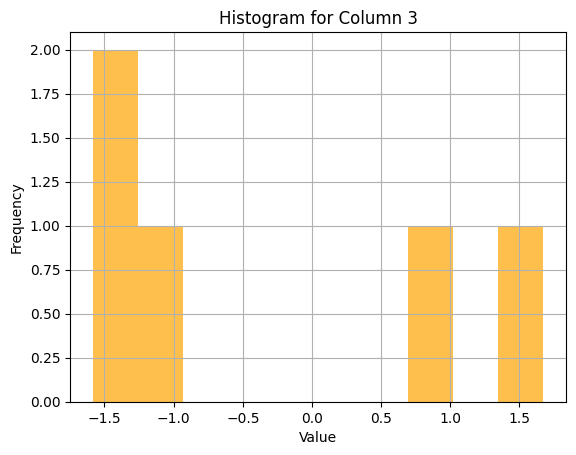

Matrix:
[[ 0.06059296  0.45062576 -1.19746017]
 [ 1.38462166 -0.67713482 -1.58623558]
 [ 1.35481937  0.51210578  1.67409816]
 [-0.38335829 -0.78941946 -1.57796026]
 [ 0.95511895 -0.22555021  0.89003038]]
Row Means: [-0.22874715 -0.29291625  1.1803411  -0.91691267  0.53986637]
Row Variances: [0.49455672 1.54481074 0.24025905 0.2459729  0.29363736]
Column Means: [ 0.67435893 -0.14587459 -0.35950549]
Column Variances: [0.50836003 0.29829729 1.8777101 ]


In [10]:
matrix, row_means, row_variances, col_means, col_variances = fill_and_analyze_matrix(5, 3)

# Вывод
print("Matrix:")
print(matrix)
print("Row Means:", row_means)
print("Row Variances:", row_variances)
print("Column Means:", col_means)
print("Column Variances:", col_variances)

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [11]:
def chess(m, n, a, b):
    matrix = np.zeros((m, n), dtype=int)  # Заполняем матрицу нулями

    for i in range(m):
        for j in range(n):
            if (i + j) % 2 == 0:  # Если сумма индексов ячейки четная, ставим значение a
                matrix[i, j] = a
            else:  # Если сумма индексов ячейки нечетная, ставим значение b
                matrix[i, j] = b

    return matrix  # Получаем "шахматную" матрицу

In [12]:
def test_chess():
    # Тест 1: 2x2 матрица
    m1, n1, a1, b1 = 2, 2, 1, 2
    expected1 = np.array([[1, 2], [2, 1]])
    assert np.array_equal(chess(m1, n1, a1, b1), expected1), "Test case 1 failed"
    
    # Тест 2: 3x3 матрица
    m2, n2, a2, b2 = 3, 3, 3, 4
    expected2 = np.array([[3, 4, 3], [4, 3, 4], [3, 4, 3]])
    assert np.array_equal(chess(m2, n2, a2, b2), expected2), "Test case 2 failed"
    
    # Тест 3: 4x5 матрица
    m3, n3, a3, b3 = 4, 5, 7, 8
    expected3 = np.array([[7, 8, 7, 8, 7], [8, 7, 8, 7, 8], [7, 8, 7, 8, 7], [8, 7, 8, 7, 8]])
    assert np.array_equal(chess(m3, n3, a3, b3), expected3), "Test case 3 failed"
    
    # Тест 4: 1x1 матрица
    m4, n4, a4, b4 = 1, 1, 5, 6
    expected4 = np.array([[5]])
    assert np.array_equal(chess(m4, n4, a4, b4), expected4), "Test case 4 failed"
    
    # Тест 5: 2x3 матрица
    m5, n5, a5, b5 = 2, 3, 10, 20
    expected5 = np.array([[10, 20, 10], [20, 10, 20]])
    assert np.array_equal(chess(m5, n5, a5, b5), expected5), "Test case 5 failed"
    
    print("All test cases passed!")


test_chess()

All test cases passed!


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

In [13]:
def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    image = np.full((m, n, 3), background_color, dtype=np.uint8)  # Создаём изображение с фоновым цветом

    # Определяем координаты прямоугольника (центрируем по изображению)
    start_x = (n - a) // 2
    start_y = (m - b) // 2

    image[start_y:start_y + b, start_x:start_x + a] = rectangle_color  # Рисуем прямоугольник

    plt.imshow(image)  # Отображаю изображение
    plt.axis('off')  
    plt.show()


def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    image = np.full((m, n, 3), background_color, dtype=np.uint8)  # Создаём изображение с фоновым цветом

    x0, y0 = n // 2, m // 2  # Координаты центра

    # Рисуем овал 
    for y in range(m):
        for x in range(n):
            if ((x - x0) ** 2) / (a ** 2) + ((y - y0) ** 2) / (b ** 2) <= 1:
                image[y, x] = ellipse_color

    plt.imshow(image)  # Отображаю изображение
    plt.axis('off')  
    plt.show()

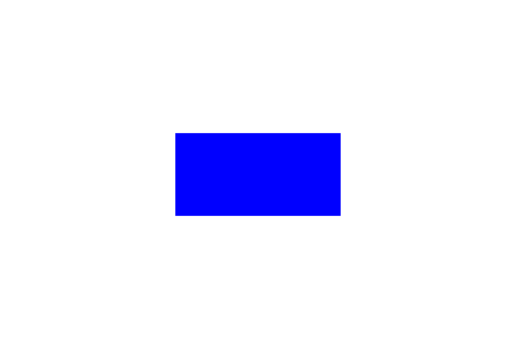

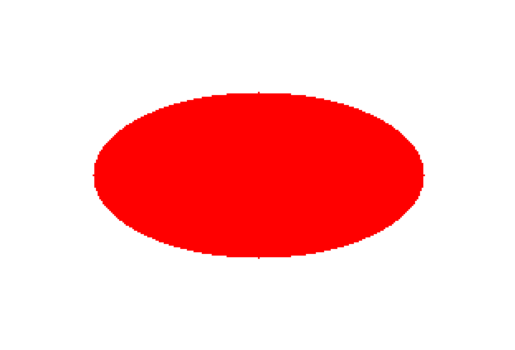

In [14]:
draw_rectangle(100, 50, 200, 300, rectangle_color=(0, 0, 255), background_color=(255, 255, 255))
draw_ellipse(100, 50, 200, 300, ellipse_color=(255, 0, 0), background_color=(255, 255, 255))

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [15]:
import pandas as pd
from scipy.signal import find_peaks


def analyze_time_series(series, p):
    series = np.array(series)  # Преобразую в массив NumPy
    mean = np.mean(series)   # Вычисляем математическое ожидание
    variance = np.var(series)  # Вычисляем дисперсию
    std_dev = np.std(series)  # Вычисляем стандартное отклонение

    # Находим локальные максимумы и минимумы
    local_maxima, _ = find_peaks(series)
    local_minima, _ = find_peaks(-series)  

    moving_average = pd.Series(series).rolling(window=p, min_periods=1).mean().to_numpy()  # Вычисляю скользящее среднее

    # Сохраняем результаты в формате словаря
    results = {
        'mean': mean,
        'variance': variance,
        'std_dev': std_dev,
        'local_maxima': local_maxima,
        'local_minima': local_minima,
        'moving_average': moving_average
    }

    return results

In [16]:
# Пример использования
time_series = [1, 3, 2, 5, 4, 8, 6, 7, 5, 10]
p = 3

results = analyze_time_series(time_series, p)

# Вывод результатов
for key, value in results.items():
    print(f"{key}: {value}")

mean: 5.1
variance: 6.890000000000001
std_dev: 2.6248809496813377
local_maxima: [1 3 5 7]
local_minima: [2 4 6 8]
moving_average: [1.         2.         2.         3.33333333 3.66666667 5.66666667
 6.         7.         6.         7.33333333]


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [17]:
# Your code goes here
def one_hot_encode(labels):
    labels = np.array(labels)  # Преобразуем метки в массивы NumPy

    # Получаем количества классов
    num_classes = np.max(labels) + 1  # Метки начинаются с 0

    one_hot_matrix = np.zeros((len(labels), num_classes))
    
    one_hot_matrix[np.arange(len(labels)), labels] = 1  # Устанавливаю значения в 1 для соответствующих меток классов

    return one_hot_matrix

In [18]:
labels = [0, 2, 3, 0]
one_hot_encoded = one_hot_encode(labels)

print(one_hot_encoded)

[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]
